# Using quandl zillow api for Chicago and Evanston Home Sale Prices using ARIMA and EWMAs

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

Find the quandl api documentation here -

In [4]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X = california.data
y = california.target * 100000

print(f'Data shape is {X.shape}')
print(f'Target shape is {y.shape}')

Data shape is (20640, 8)
Target shape is (20640,)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

quandl.ApiConfig.api_key = ''
%matplotlib inline

In [9]:
quandl_call = (
    "ZILLOW/{category}{code}_{indicator}"
)


def download_data(category, code, indicator):
    """
    Reads in a single dataset from Zillow Quandl API
    
    Parameters
    ----------
    category : "Chicago_Area" or "Evanston"
    
    code : "Evanston" or "Chicago"
    
    indicator : "Sales_Price" or "other"

    
    Returns
    -------
    DataFrame
    """
    AREA_CATEGORY_dict = {"Evanston": "C", "Chicago_Area": "C"}
    AREA_CODE_dict = {"Evanston": "64604", "Chicago": "36156"}
    INDICATOR_CODE_dict = {"Sales_Price": "SP"}
    
    
    
    category = AREA_CATEGORY_dict[category]
    code = AREA_CODE_dict[code]
    indicator = INDICATOR_CODE_dict[indicator]

    
    
    return quandl.get(quandl_call.format(category=category, code=code, indicator=indicator))

In [73]:
# data = quandl.get_table("ZILLOW/REGIONS", paginate=True) 

In [72]:
# col = 'region'
# mask = np.column_stack([data[col].str.contains(r"Boston", na=False) for col in data])
# data.loc[mask.any(axis=1)]

In [74]:
# col = 'region'
# mask = np.column_stack([data[col].str.contains(r"Evanston", na=False) for col in data])
# df=data.loc[mask.any(axis=1)]
#df['region']

## Chicago and Evanston Home Sale Prices

In [12]:
EV_SP = download_data('Chicago_Area', 'Evanston', 'Sales_Price')
CH_SP = download_data('Chicago_Area', 'Chicago', 'Sales_Price')

In [14]:
CH_SP.query("Value > 270000")

,Value
Date,
2008-03-31,325100.0
2008-04-30,314800.0
2008-05-31,286900.0
2008-06-30,274600.0
2019-03-31,290800.0
2019-04-30,292000.0
2019-05-31,276000.0
2019-06-30,271500.0
2020-01-31,281400.0


In [19]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

q = """SELECT date
        ,Value 
       FROM CH_SP
       WHERE Value > 270000
       LIMIT 10;"""

values = pysqldf(q)
values

,Date,Value
0,2008-03-31 00:00:00.000000,325100.0
1,2008-04-30 00:00:00.000000,314800.0
2,2008-05-31 00:00:00.000000,286900.0
3,2008-06-30 00:00:00.000000,274600.0
4,2019-03-31 00:00:00.000000,290800.0
5,2019-04-30 00:00:00.000000,292000.0
6,2019-05-31 00:00:00.000000,276000.0
7,2019-06-30 00:00:00.000000,271500.0
8,2020-01-31 00:00:00.000000,281400.0
9,2020-02-29 00:00:00.000000,302900.0


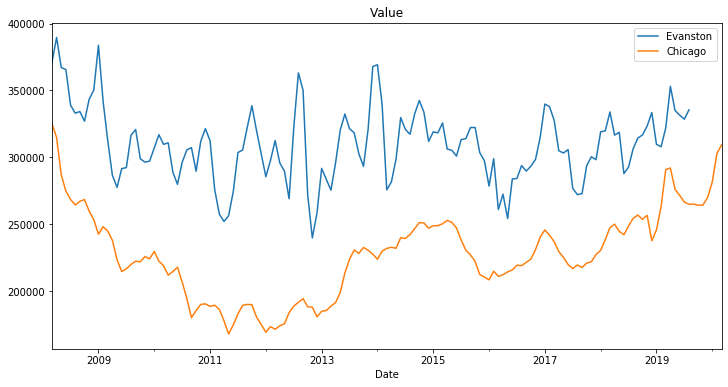

In [79]:
fig = plt.figure(figsize=(12, 6))
plt.title('Value')

EV_SP['Value'].plot(label='Evanston')
CH_SP['Value'].plot(label='Chicago')

plt.legend()

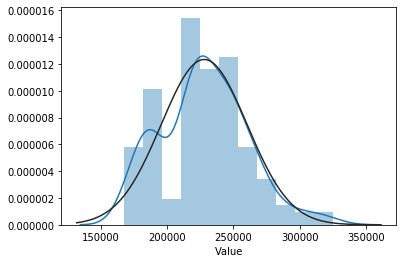

In [80]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(CH_SP['Value'], fit=norm);

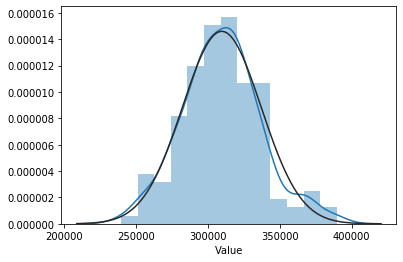

In [81]:
sns.distplot(EV_SP['Value'], fit=norm);